# Linear Regression With Single Variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/auto_insurance_sweden.csv")

data.head()

,number of claims,total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
data.shape

(63, 2)

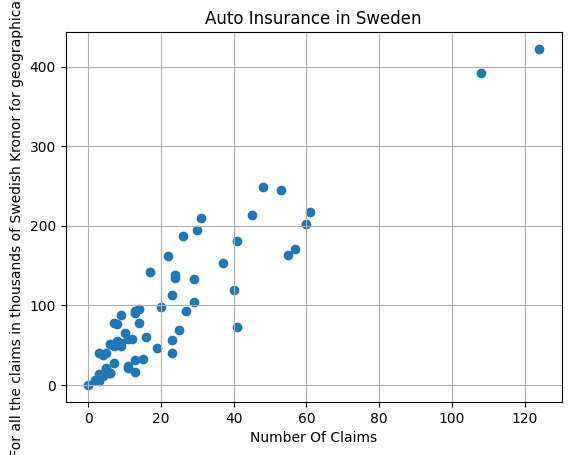

In [4]:
# print(plt.style.available)
# plt.style.use("fivethirtyeight")
plt.style.use("default")

plt.scatter(data["number of claims"], data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"])

plt.title("Auto Insurance in Sweden")
plt.xlabel("Number Of Claims")
plt.ylabel("Total Payment For all the claims in thousands of Swedish Kronor for geographical zones in Sweden")
plt.grid(True)

plt.show()

In [5]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

In [6]:
training_data.head(3)

,number of claims,total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden
29,4,38.1
0,108,392.5
13,23,39.6


In [7]:
training_data.shape

(50, 2)

In [8]:
testing_data.head(3)

,number of claims,total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden
4,40,119.4
5,57,170.9
8,45,214.0


In [9]:
testing_data.shape

(13, 2)

In [10]:
x_train = training_data["number of claims"]
x_test = testing_data["number of claims"]

In [11]:
x_train.head(3)

29      4
0     108
13     23
Name: number of claims, dtype: int64

In [12]:
x_test.head(3)

4    40
5    57
8    45
Name: number of claims, dtype: int64

In [13]:
y_train = training_data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"]
y_test = testing_data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"]

In [14]:
y_train.head(3)

29     38.1
0     392.5
13     39.6
Name: total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden, dtype: float64

In [15]:
y_test.head(3)

4    119.4
5    170.9
8    214.0
Name: total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden, dtype: float64

## Model 

In [16]:
class LinearRegression:
    
    def __init__(self, learning_rate=0.00008, iterations=1000):
        self.learning_rate = learning_rate 
        self.iterations = iterations
        self.width = None # np.zeros((self.x_train.shape[1], 1)) # theta is array n, x
        self.bias = None
         
        
    def fit(self, x_train, y_train):
        
        # save all value for argments in list
        cost_list = []
        width_list = []
        bias_list = []
        
        # init argments   
        x = np.vstack((np.ones(x_train.shape[0]), x_train)).T # add one column one value 
        
        y = y_train # .to_numpy().reshape(y_train.shape[0], 1) # reshape for 2, 1
        
        n_samples, n_features = x.shape
        
        self.width = np.zeros(n_features)
        
        self.bias = 0
        
        
        for _ in range(self.iterations):
            
            y_predicted = np.dot(x, self.width) + self.bias
            
            cost = (1 / (2 * n_samples) * np.sum(np.square(y_predicted - y)))
            
            dw = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
            
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            self.width -= self.learning_rate * dw
            
            self.bias -= self.learning_rate * db
            
            cost_list.append(cost)
            width_list.append(self.width)
            bias_list.append(self.bias)
            
        return cost_list, width_list, bias_list
            
        
    def predict(self, x):
        x = np.vstack((np.ones(x.shape[0]), x)).T
        y_predicted = np.dot(x, self.width) + self.bias
        return y_predicted
    
    
    def mean_absolute_error(self, y_true, y_pred):
        return np.sum(np.abs(y_pred - y_true)) / len(y_true)

In [17]:
LR = LinearRegression()

cost_list, width_list, bias_list = LR.fit(x_test, y_test)

In [18]:
predictions = LR.predict(x_test)
predictions

array([148.64320908, 210.94098743, 166.96608506,   9.3893516 ,
        13.0539268 ,  27.71222759,  16.718502  ,  27.71222759,
        93.67458113, 203.61183703,  64.35797955,  31.37680278,
        97.33915633])

## Model Accuracy

In [19]:
acc = LR.mean_absolute_error(y_test, predictions)
print(f"Cost Value: {acc}")
print(predictions)

Cost Value: 33.196927889872995
[148.64320908 210.94098743 166.96608506   9.3893516   13.0539268
  27.71222759  16.718502    27.71222759  93.67458113 203.61183703
  64.35797955  31.37680278  97.33915633]


## Cost Function

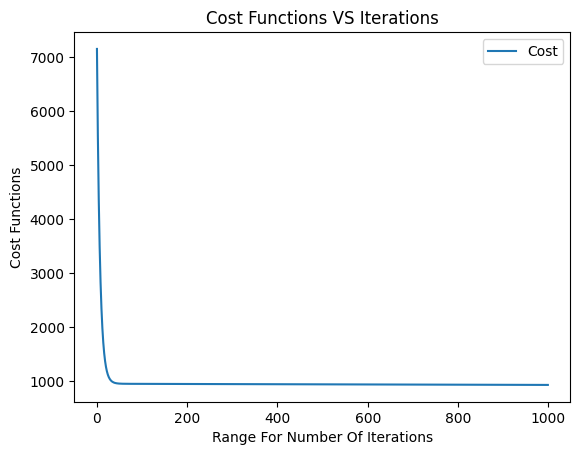

In [20]:
indexs_x = np.arange(0, LR.iterations) # LinearRegression.iteration

plt.plot(indexs_x, cost_list, label='Cost')

plt.title("Cost Functions VS Iterations")
plt.xlabel("Range For Number Of Iterations")
plt.ylabel("Cost Functions")
plt.legend()

plt.show()

## Prediction Linear

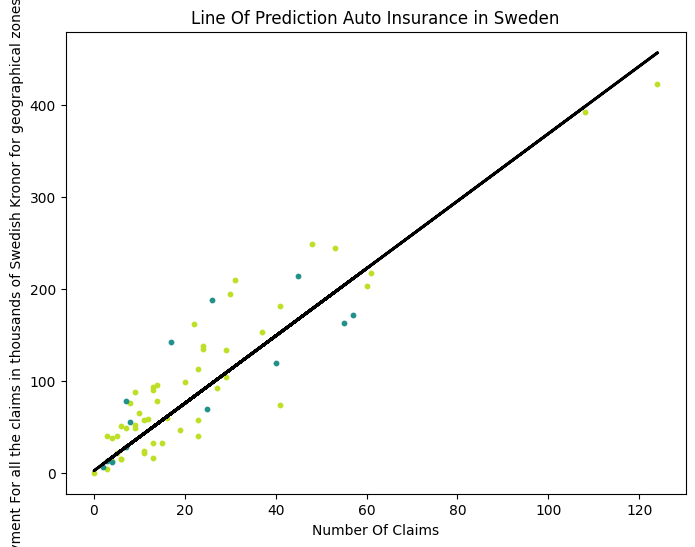

In [21]:
x, y = data["number of claims"], data["total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden"]

y_pred_line = LR.predict(x)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.plot(x, y_pred_line, color="black", linewidth=2, label="Prediction")

plt.title("Line Of Prediction Auto Insurance in Sweden")
plt.xlabel("Number Of Claims")
plt.ylabel("Total Payment For all the claims in thousands of Swedish Kronor for geographical zones in Sweden")
plt.show()